In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Praktikum 3/Data/stunting_wasting_dataset.csv')

# Cetak header data (5 baris data) dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [ ]:
df1 =(df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]])\
.rename(columns={"Berat Badan (kg)": "berat_kg", "Jenis Kelamin": "jk", "Umur (bulan)": "umur_bln", "Tinggi Badan (cm)": "tinggi_cm"}).copy()

# Laki-laki =1, Perempuan = 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [ ]:
# Hitung matrix korelasi
corr_matrix = df1.corr()
corr_matrix

,berat_kg,jk,umur_bln,tinggi_cm
berat_kg,1.000000,0.045797,0.665389,0.626005
jk,0.045797,1.000000,0.004046,0.073505
umur_bln,0.665389,0.004046,1.000000,0.875869
tinggi_cm,0.626005,0.073505,0.875869,1.000000


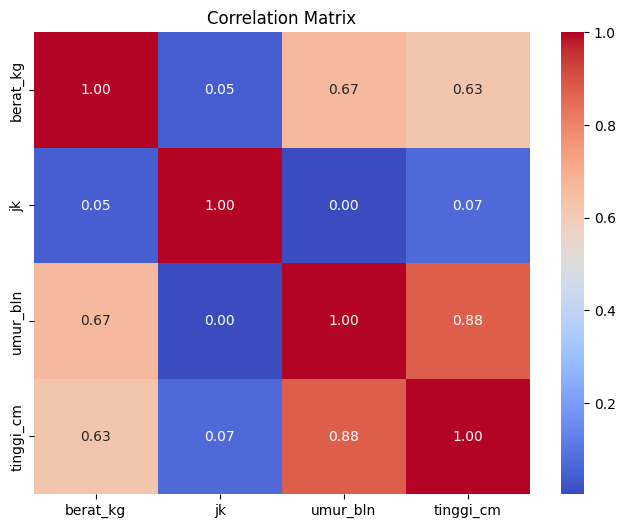

In [ ]:
# Buat Heatmap Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan target y adalah berat badan => variabel dependen
y = df1["berat_kg"]

# Fitur (x) adalah umur dan tinggi => variabel independen
x = df1["umur_bln", "tinggi_cm"]

#Bagi data 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#cetak pembagian data
print('JUMLAH DATA TRAIN :', len(x_train))
print('JUMLAH DATA TEST :', len(x_test))

x_train.head()

JUMLAH DATA TRAIN : 80000
JUMLAH DATA TEST : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [ ]:
# Tambahkan konstanta
import statsmodels.api as sm
x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [ ]:
# Buat model OLS
model = sm.OLS(y_train, x_train_const).fit()
print('------------------')
print(model.params)
print('------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']
# Print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [ ]:
# tampilkan ringkasan hasil
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:05:41   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [ ]:
# pengujian model dengan data testing
#tambahkan konstanta ke data uji
import numpy as np
x_test_const = sm.add_constant(x_test, prepend=False)

#prediksi berat badan
y_pred_test = model.predict(x_test_const)

# buat tabel hasil prediksi
results = pd.DataFrame({'Umur (bulan)': x_test['umur_bln'].to_numpy(),
                        'Tinggi Badan (cm)': x_test['tinggi_cm'].to_numpy(),
                        'Berat Badan Aktual': y_test.to_numpy(),
                        'Berat Badan Diperkirakan': y_pred_test})

# 1 Selisih error (positif = overpredict)
results['Selisih Error'] = results['Berat Badan Diperkirakan'] - results['Berat Badan Aktual']

# 2 Akurasi perbaris (100 *(1- error))
denom = results['Berat Badan Aktual'].replace(0, np.nan)
results['Akurasi Perbaris'] = (1 - (abs(results['Selisih Error'].abs()) / denom)).clip(lower=0, upper=1) * 100

#cetak hasil prediksi
results

,Umur (bulan),Tinggi Badan (cm),Berat Badan Aktual,Berat Badan Diperkirakan,Selisih Error,Akurasi Perbaris
75721,1,54.6,7.0,15.142455,8.142455,0.0
80184,8,66.0,12.2,35.580571,23.380571,0.0
19864,20,90.0,10.9,71.641229,60.741229,0.0
76699,13,82.4,9.6,52.076045,42.476045,0.0
92991,11,70.1,13.2,44.159270,30.959270,0.0
...,...,...,...,...,...,...
32595,9,67.3,11.8,38.424822,26.624822,0.0
29313,15,80.2,9.6,56.661899,47.061899,0.0
37862,8,61.9,8.0,34.638724,26.638724,0.0
53421,12,74.9,5.4,47.807537,42.407537,0.0
